# Neural Network Assignment

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#we will use MNIST dataset for neural network scratch validation
# download the dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)

(60000, 28, 28)
(10000, 28, 28)
uint8


In [24]:
# we have to convert each image of (1,28,28) to (1, 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)

(60000, 784)
(10000, 784)
uint8


In [26]:
# preprocessing the data: Images are represented as uint8 type from 0 to 255, but in machine learning, they are treated as float type from 0 to 1. It can be converted with the following code.
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())

C:\Users\Hp\AppData\Local\Temp\ipykernel_17968\2323180211.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float)
C:\Users\Hp\AppData\Local\Temp\ipykernel_17968\2323180211.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float)


1.0
0.0


In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape)
print(X_val.shape)

(48000, 784)
(12000, 784)


## Problem 1: Create a code that determines the initial value of the weight

In [29]:
lr = 0.0001 # learning rate to be used at back propagation function
batch_size = 20 # batch size
n_features = 784 # number of features
sigma = 0.01
n_nodes1 = 400 # number of nodes in first layer
n_nodes2 = 200 # number of nodes in the second layer
n_output = 10 # number of output classes(number of nodes in the third layer
#if we take a neural network with three layers then the code for initializing the weights is
W1 = sigma * np.random.randn(n_features, n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
B1 = sigma * np.random.randn(1, n_nodes1)
B2 = sigma * np.random.randn(1, n_nodes2)
B3 = sigma * np.random.randn(1, n_output)

## Problem 2: Implementation of forward propagation

- create forward propagation of a three-layer neural network . In the explanation below, the number of nodes is 400 for the first layer and 200 for the second layer.

1. batch_size = 20 # batch size
2. n_features = 784 # number of features
3. n_nodes1 = 400 # number of nodes in first layer
4. n_nodes2 = 200 # number of nodes in the second layer
5. n_output = 10 # number of output classes(number of nodes in the      third layer

<b><u> First Layer </u></b>

$$ A_1 = X \cdot W_1 + B_1 $$

$X$ : feature vector (batch_size, n_features)

$W_1$ : 1st layer weight (n_features, n_nodes1)

$B_1$ : 1st layer bias (n_nodes1,)

$A_1$ : output (batch_size, n_nodes1)

<b> Activation function of the first layer </b>

$$ Z_1 = f(A_1) $$

$f()$ : activation function

$Z_1$ output (batch_size, n_nodes1)


<b><u> Second Layer </u></b>

$$ A_2 = Z_1 \cdot W_2 + B_2 $$

$W_2$ : 2nd layer weight (n_nodes1, n_nodes2)

$B_2$ : 2nd layer bias (n_nodes2,)

$A_2$ : output (batch_size, n_nodes2)

<b> Activation function of the second layer </b>

$$ Z_2 = f(A_2) $$

$f()$ : activation function

$Z_2$ output (batch_size, n_nodes2)

<b><u> Third Layer </u></b>

$$ A_3 = Z_2 \cdot W_3 + B_3 $$

$W_3$ : 3rd layer weight (n_nodes2, n_output)

$B_3$ : 3rd layer bias (n_output,)

$A_3$ : Output (batch_size, n_output)

<b> Activation function of the third layer </b>

$$ Z_3 = softmax(A_3) $$

$softmax()$ : softmax function

$Z_3$ output (batch_size, n_output)

$Z_3$ is an array of probabilities for each label (0-9)

In [10]:
## ACTIVATION FUNCTIONS
# step function
def step_function(self,X):
    result = np.array(X >= 0, dtype=np.int)
    return result
# relu function
def relu(self,X):
    result = np.max([np.zeros(X.shape), X], axis=0)   
    return result
# sigmoid function
def sigmoid(self,X):
    result = 1 / (1 + np.exp(-X))   
    return result
# tanh function
def tanh(X):
    result = (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
    # or
    #  result = np.tanh(X)
    return result

### Softmax function

$$ Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n_c}exp(A_{3\_i})} $$

$Z_{3_k}$ : $k$th class probability vector (batch_size,)

$A_{3_k}$ : the vector from the previous layer corresponding to the $k$th class (batch_size,)

$n_c$ : number of classes, n_output

$Z_3$ is calculated by calculating this for 10 classes

In [11]:
# softmax function where A3-k is substituted by X
def softmax(X):
    result = np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
    return result

In [12]:
def forward(X):
    A1 = X @ W1 + B1
    Z1 = tanh(A1) # using tahn as activation function
    A2 = Z1 @ W2 + B2
    Z2 = tanh(A2) # using tahn as activation function
    A3 = Z2 @ W3 + B3
    Z3 = softmax(A3) # using softmax function at the final output

In [13]:
forward(X_train) # passing X_train data to forward propagation through the neural network

## Problem 3: Implementation of cross-entropy error

- formula for the loss function
$$ L = - \frac{1}{n_b}\sum_{i}^{n_b}\sum_{j}^{n_c}y_{ij} log(z_{3\_ij}) $$

$y_{ij}$ : correct label of $k$th class of $j$th sample (scalar 0 or 1 in one-hot representation)

$z_{3_ij}$ : Probability of $k$th class of $j$th sample (scalar)

$n_{b}$ : batch size, batch_size

$n_{c}$ : number of classes, n_output (10 for MNIST this time)

In [14]:
def cross_entropy_error(y, Z):
    L = - np.sum(y * np.log(Z+1e-7)) / len(y)
    return L

## Problem 4: Implemetation of back propagation

In [ ]:
def backward(X, y):
    dA3 = (Z3 - y)/batch_size
    dW3 = Z2.T @ dA3
    dB3 = np.sum(dA3, axis=0)
    dZ2 = dA3 @ W3.T
    dA2 = dZ2 * (1 - tanh(A2)**2)
    dW2 = Z1.T @ dA2
    dB2 = np.sum(dA2, axis=0)
    dZ1 = dA2 @ W2.T
    dA1 = dZ1 * (1 - tanh(A1)**2)
    dW1 = X.T @ dA1
    dB1 = np.sum(dA1, axis=0)
    W3 -= lr * dW3
    B3 -= lr * dB3
    W2 -= lr * dW2
    B2 -= lr * dB2
    W1 -= lr * dW1
    B1 -= lr * dB1

## Question 5: Presumption

In [47]:
def predict(self, X):
    self.forward(X)
    return np.argmax(self.Z3, axis=1)

## Question 6: Learning and Estimation
- Learn and estimate MNIST data and calculate Accuracy.

- From earlier codes we will build a complete class and use it to learn and estimaate the data

In [40]:
# class to calculate the  mini batch for use in stochastic gradient descent method
class GetMiniBatch:
    def __init__(self, X, y, batch_size = 20, seed = 0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]
        
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [41]:
class ScratchSimpleNeuralNetrowkClassifier():
    def __init__(self,batch_size = 20,n_features = 784,n_nodes1 = 400,n_nodes2 = 200,n_output = 10,sigma = 0.02,lr = 0.01,epoch = 10, verbose=True):
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2 
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        self.loss_train = []
        self.loss_val = []
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.B3 = self.sigma * np.random.randn(1, self.n_output)
   
    def fit(self, X, y, X_val=None, y_val=None):
        for _ in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            for mini_X_train, mini_y_train in get_mini_batch:
                self.forward(mini_X_train)
                self.backward(mini_X_train, mini_y_train)
            self.forward(X)
            self.loss_train.append(self.cross_entropy_error(y, self.Z3))
            if X_val is not None:
                self.forward(X_val)
                self.loss_val.append(self.cross_entropy_error(y_val, self.Z3))
        if self.verbose:
            if X_val is None:
                print(self.loss_train)
            else:
                print(self.loss_train,self.loss_val)
    
    def forward(self, X):
        self.A1 = X @ self.W1 + self.B1
        self.Z1 = self.tanh_function(self.A1)
        self.A2 = self.Z1 @ self.W2 + self.B2
        self.Z2 = self.tanh_function(self.A2)
        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = self.softmax(self.A3)
    
    def backward(self, X, y):
        dA3 = (self.Z3 - y)/self.batch_size
        dW3 = self.Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)
        dZ2 = dA3 @ self.W3.T
        dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
        dW2 = self.Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)
        dZ1 = dA2 @ self.W2.T
        dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)
        self.W3 -= self.lr * dW3
        self.B3 -= self.lr * dB3
        self.W2 -= self.lr * dW2
        self.B2 -= self.lr * dB2
        self.W1 -= self.lr * dW1
        self.B1 -= self.lr * dB1
            
    def tanh_function(self, A):
        result = (np.exp(A)-np.exp(-A))/(np.exp(A)+np.exp(-A))
        return result
    
    def softmax(self, A):
        result = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
        return result

    def cross_entropy_error(self, y, Z):
        L = - np.sum(y * np.log(Z+1e-7)) / len(y)
        return L
        
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z3, axis=1)

In [42]:
nn = ScratchSimpleNeuralNetrowkClassifier(epoch=10)
nn.fit(X_train,y_train_one_hot, X_test, y_test_one_hot)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17968\1173429722.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)


[0.43305210633578683, 0.3307388899599091, 0.2945049640756209, 0.271708755006694, 0.2534251290431309, 0.23662099469632455, 0.22040735661199673, 0.20480078400113272, 0.1901032224400253, 0.17655339231058229] [0.4197752245603694, 0.3212404463549458, 0.28856229027903985, 0.2685631789696204, 0.25256348951625435, 0.23770092053309436, 0.22320432819739303, 0.2091805633769376, 0.1959891239742341, 0.18392098681899588]


In [70]:
#presumption
pred_train = nn.predict(X_train)
pred_train

array([1, 4, 0, ..., 5, 2, 7], dtype=int64)

In [71]:
#Accuracy calculation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, pred_train)
accuracy

0.9494166666666667

## Problem 7: Learning Curve Plot

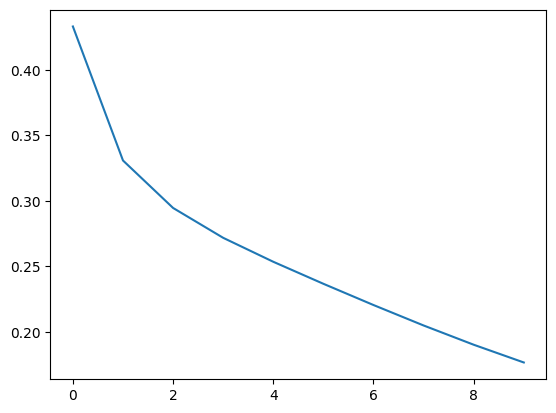

In [44]:
plt.plot(range(nn.epoch), nn.loss_train)

## Question 8: (Advanced Task) Confirmation of                                             misclassification

C:\Users\Hp\AppData\Local\Temp\ipykernel_17968\3695066595.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  true_false = pred_train==y_val
C:\Users\Hp\AppData\Local\Temp\ipykernel_17968\3695066595.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  false_list = np.where(true_false==False)[0].astype(np.int)


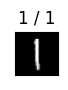

In [61]:
num = 36

true_false = pred_train==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(pred_train[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')